<a href="https://colab.research.google.com/github/satyadevshetty/YoloV8/blob/main/Fruits_Veggies_train_yolov8_object_detection_on_roboflow_dataset_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 Object Detection on a Custom Dataset


Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/satyadevshetty/YoloV8/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Execute this for making a Symbolic link

!ln -s "/content/gdrive/My Drive/yoloV8_fruit_veggies_detection" /content/yoloV8_fruit_veggies_detection

In [ ]:
#Just in case u want to remove a symbolic link

!unlink /content/yoloV8_fruit_veggies_detection

In [ ]:
!nvidia-smi

Thu Mar 30 08:36:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Check if  symbolic link is accessable
!ls /content/yoloV8_fruit_veggies_detection

train4	train_march_23_2023  weights


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
!pip show ultralytics


Name: ultralytics
Version: 8.0.20
Summary: Ultralytics YOLOv8
Home-page: https://github.com/ultralytics/ultralytics
Author: Ultralytics
Author-email: hello@ultralytics.com
License: GPL-3.0
Location: /usr/local/lib/python3.9/dist-packages
Requires: ipython, matplotlib, numpy, opencv-python, pandas, Pillow, psutil, PyYAML, requests, scipy, seaborn, sentry-sdk, tensorboard, thop, torch, torchvision, tqdm
Required-by: 


In [ ]:
#Check contents of configuration file
!cat /usr/local/lib/python3.9/dist-packages/ultralytics/yolo/cfg/default.yaml

# Ultralytics YOLO 🚀, GPL-3.0 license
# Default training settings and hyperparameters for medium-augmentation COCO training

task: detect  # inference task, i.e. detect, segment, classify
mode: train  # YOLO mode, i.e. train, val, predict, export

# Train settings -------------------------------------------------------------------------------------------------------
model:  # path to model file, i.e. yolov8n.pt, yolov8n.yaml
data:  # path to data file, i.e. i.e. coco128.yaml
epochs: 100  # number of epochs to train for
patience: 50  # epochs to wait for no observable improvement for early stopping of training
batch: 16  # number of images per batch (-1 for AutoBatch)
imgsz: 640  # size of input images as integer or w,h
save: True  # save train checkpoints and predict results
cache: False  # True/ram, disk or False. Use cache for data loading
device:  # device to run on, i.e. cuda device=0 or device=0,1,2,3 or device=cpu
workers: 8  # number of worker threads for data loading (per RANK 

In [ ]:
# Git clone method (for development) - Not using in this notebook

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -qe ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

---



### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 236MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 28.3MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.5ms
Speed: 0.6ms pre-process, 14.5ms inference, 40.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


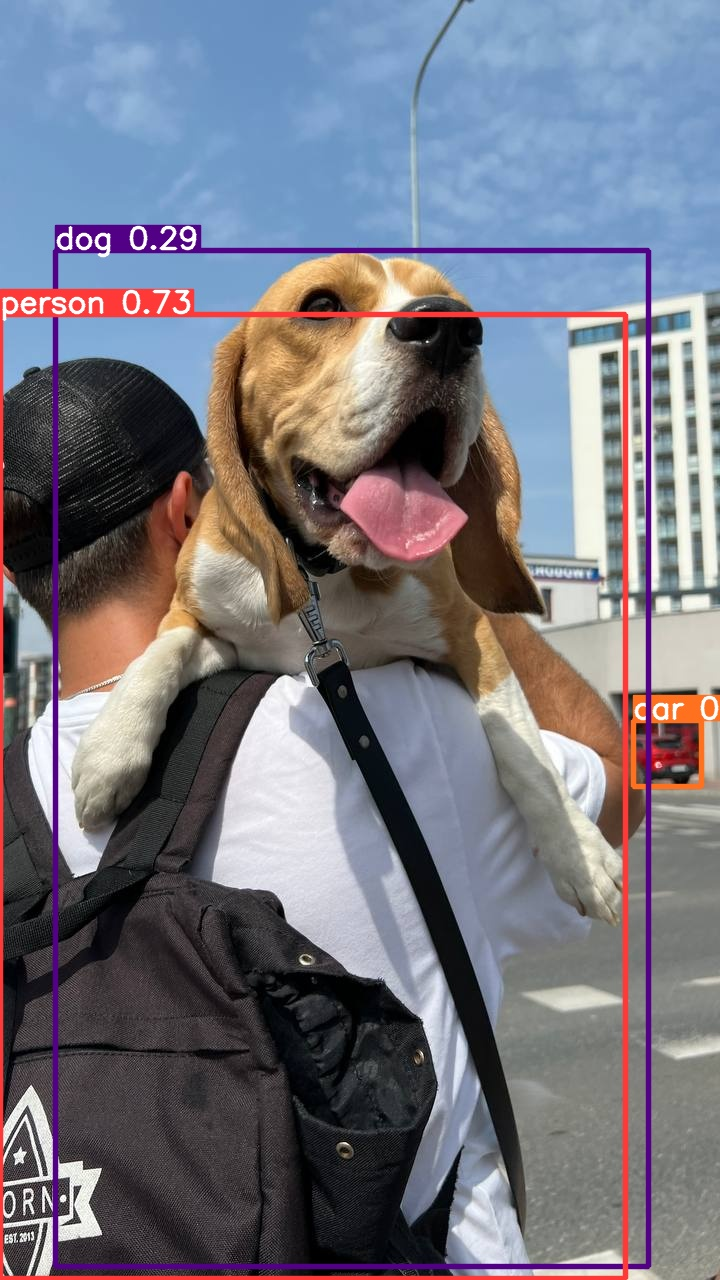

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


### Use Dataset from Roboflow
### Step 1: Creating Roboflow Account

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that you need to get the API key to access the dataset used in this Notebook

In [ ]:
#Downloading Dataset

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="l8c9y1kU5SA6MuEK95Gd")
project = rf.workspace("bohni-tech").project("fruits-and-vegi")
dataset = project.version(13).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

## Custom Training

In [ ]:
#Execute this - this is to start executing from Gdrive dir, since model is saved in dir where execution starts
# save_dir - this argument is not present in args.yml (the config file), so we cannot specify custom dir
# Work around for naming dir is given here: https://github.com/ultralytics/ultralytics/issues/512

#You will need to create the train_march_23_2023 1st at the below location on your GDrive

%cd /content/yoloV8_fruit_veggies_detection/train_march_23_2023
!pwd

In [ ]:
#Execute THIS - 1st cd into the GDrive as in above cell & then execute - This is 1st time execution, cannot be used to resume execution from checkpoint

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=1280 plots=True batch=8 

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Fruits-and-Vegi-13/data.yaml, epochs=3, patience=50, batch=8, imgsz=1280, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

In [ ]:
#Resume location (for resuming from checkpoint) in my GDrive
resume_location='/content/yoloV8_fruit_veggies_detection/train_march_23_2023/runs/detect/train7/weights/best.pt'

In [ ]:
#Checking resume location
resume_location

'/content/yoloV8_fruit_veggies_detection/train_march_23_2023/runs/detect/train7/weights/best.pt'

In [ ]:
#Resuming from Last checkpoint with resume: False / True
#Use only if training stopped before completing all epochs for ex: if you had specified epochs= 20 & training stopped at epochs= 10 then use this

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=1280 plots=True batch=8 resume=True model={resume_location}

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yoloV8_fruit_veggies_detection/train_march_23_2023/runs/detect/train7/weights/best.pt, data=/content/datasets/Fruits-and-Vegi-13/data.yaml, epochs=30, patience=50, batch=8, imgsz=1280, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxe

In [ ]:
#Gdrive Path
gdrive_path = '/content/yoloV8_fruit_veggies_detection/train_march_23_2023/runs/detect'

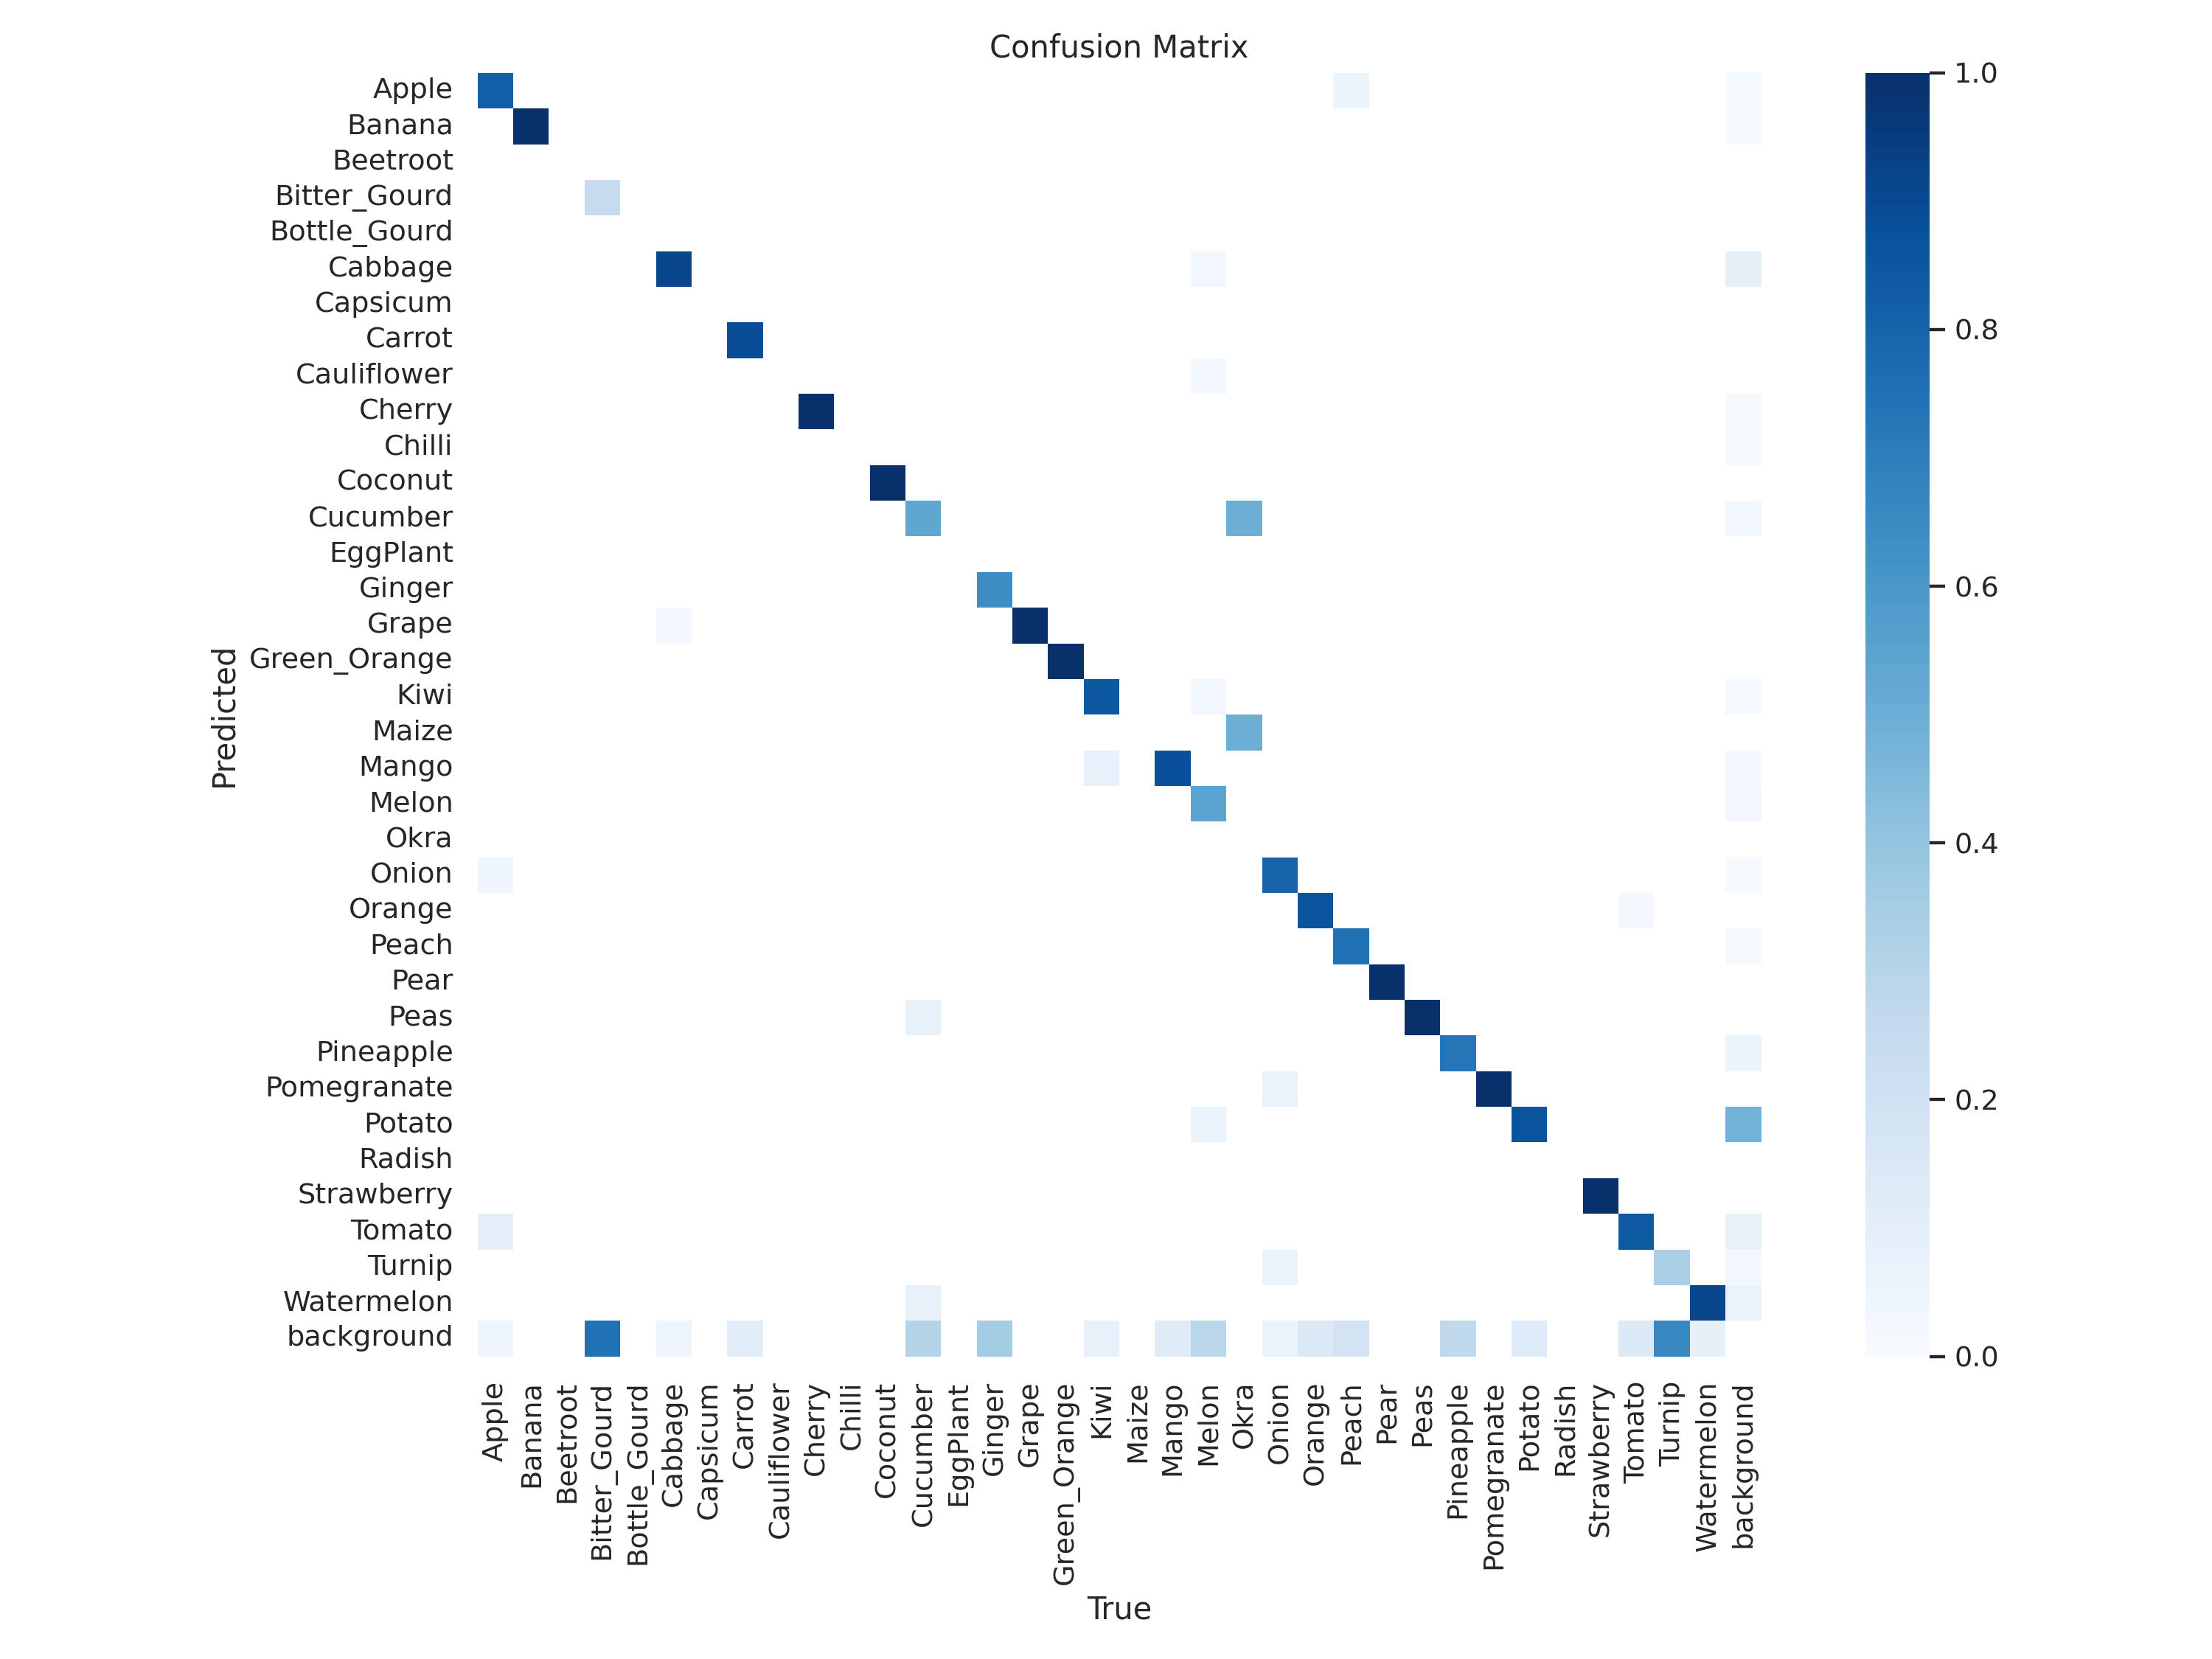

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

Image(filename=f'{gdrive_path}/train5/confusion_matrix.png', width=600)

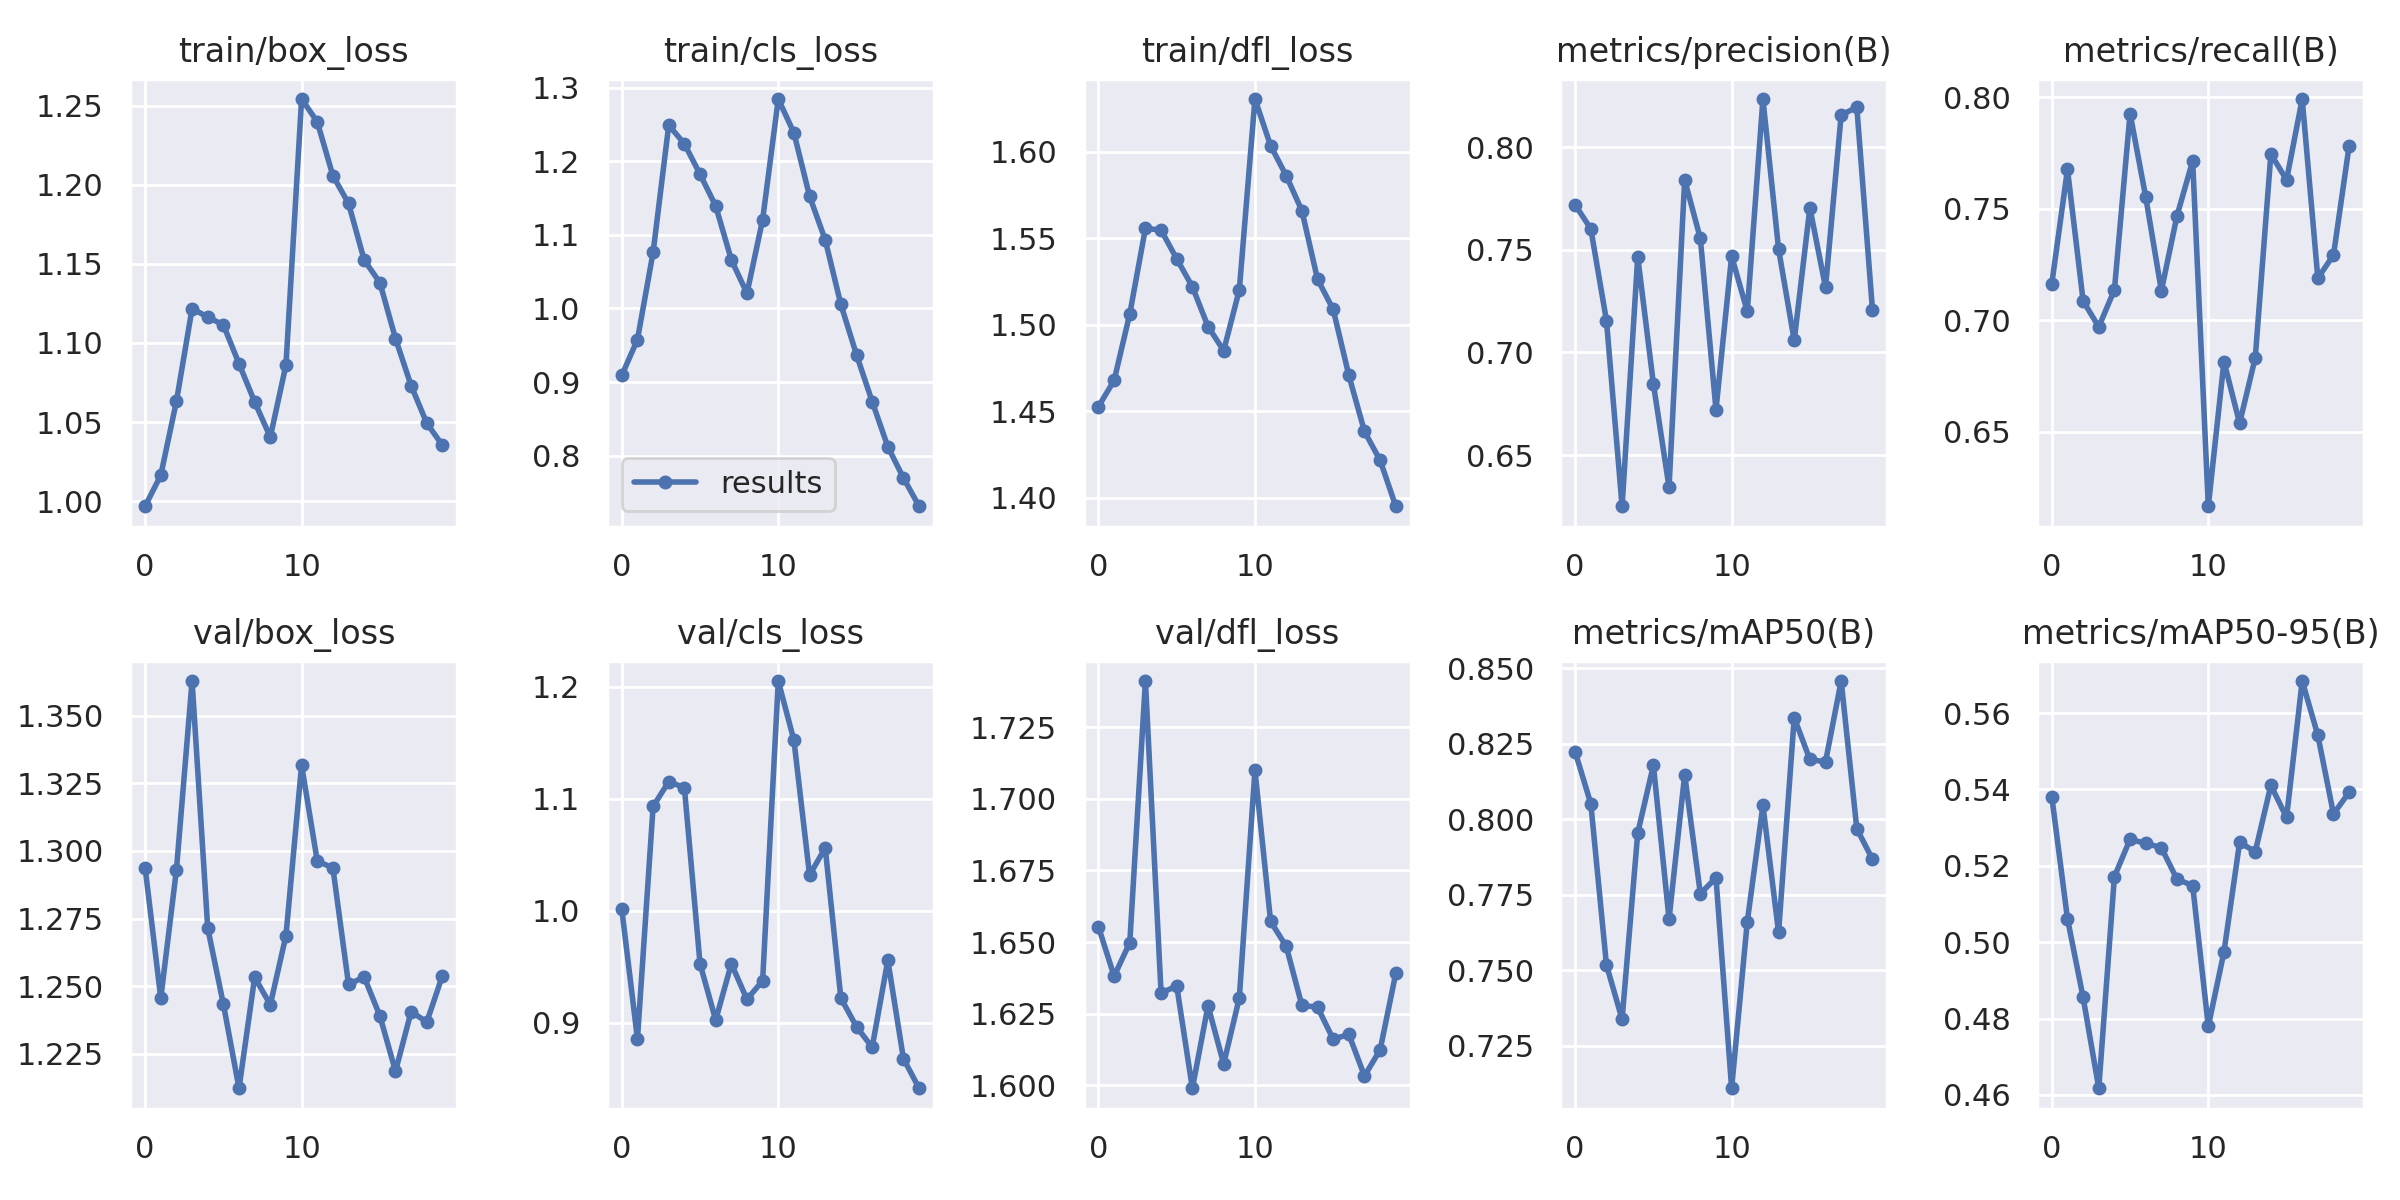

In [ ]:
Image(filename=f'{gdrive_path}/train5/results.png', width=600)

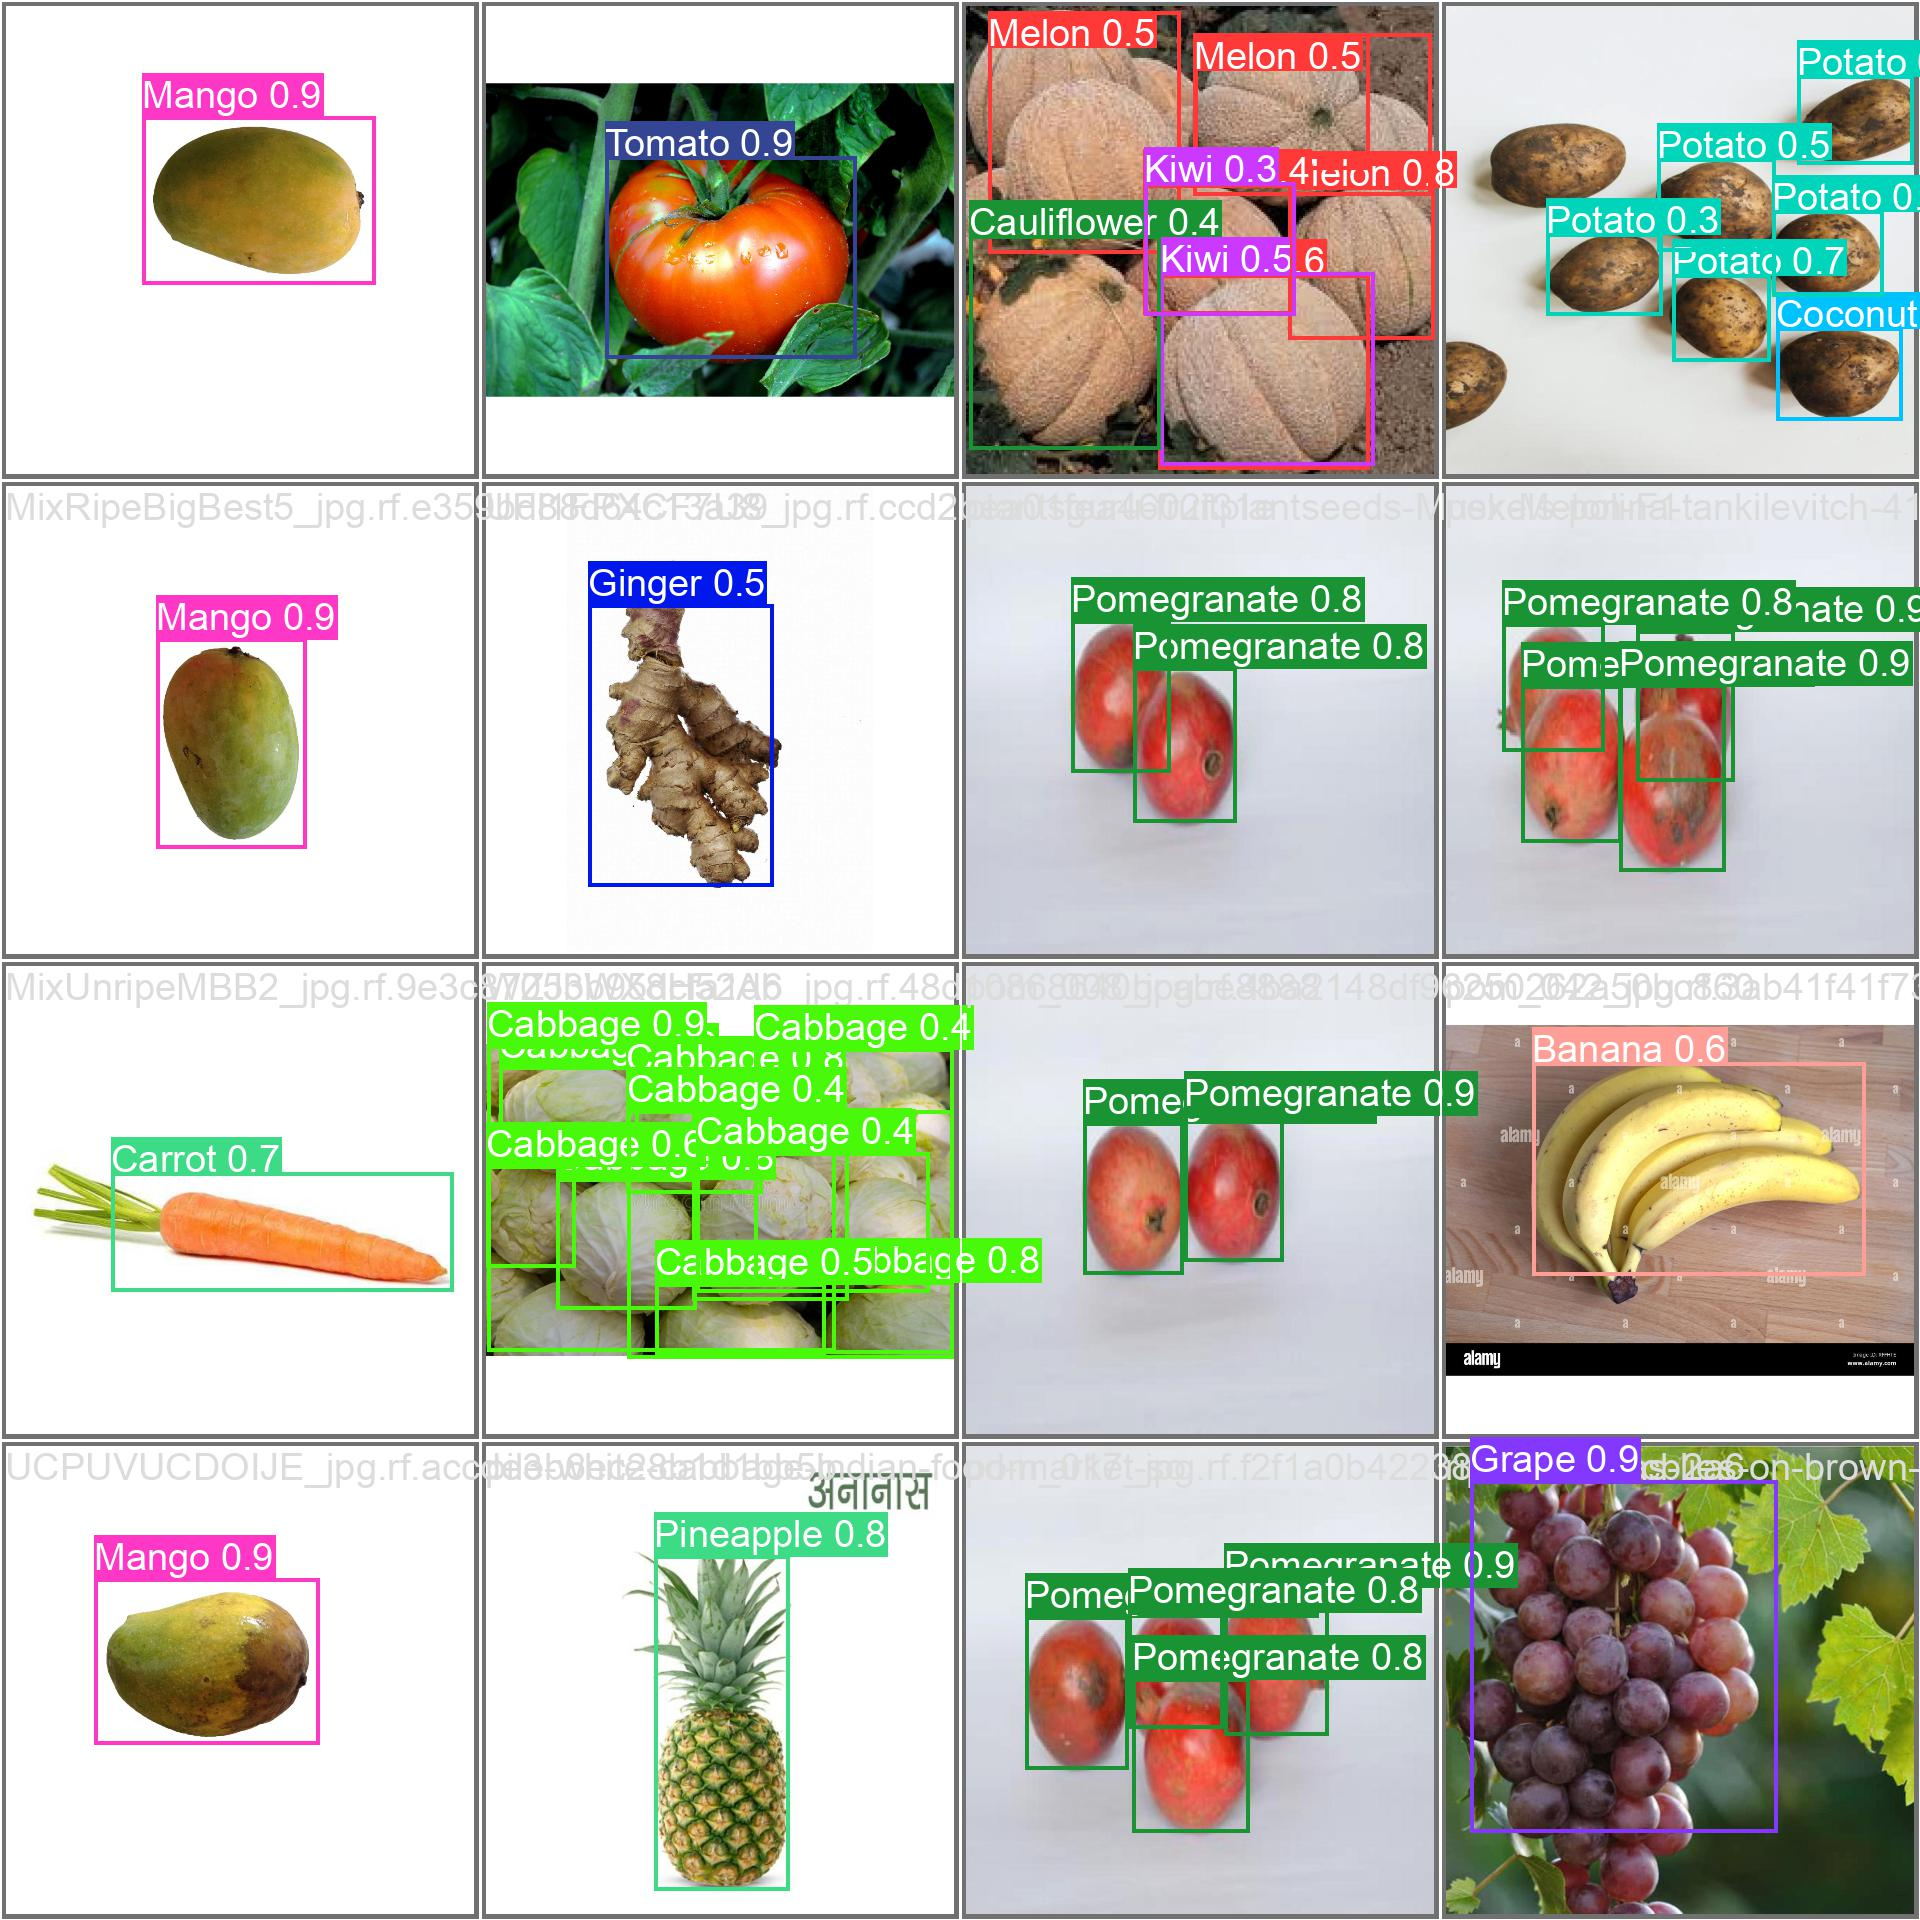

In [ ]:
Image(filename=f'{gdrive_path}/train5/val_batch2_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
dataset.location

'/content/datasets/Fruits-and-Vegi-13'

In [ ]:

!yolo task=detect mode=val model={gdrive_path}/train5/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139129 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Fruits-and-Vegi-13/valid/labels.cache... 147 images, 1 backgrounds, 0 corrupt: 100% 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:15<00:00,  1.51s/it]
                   all        147        613      0.732      0.799      0.819      0.568
                 Apple        147         22      0.887      0.864      0.877       0.74
                Banana        147          7      0.745      0.835      0.884      0.505
          Bitter_Gourd        147          4      0.665       0.25      0.301     0.0749
               Cabbage        147         38      0.662      0.921       0.85      0.611
                Carrot        147          9      0.894      0.941      0.984      0.577
                Cherry        1

## Inference with Custom Model

1.   List item
2.   List item



In [ ]:
!yolo task=detect mode=predict model={gdrive_path}/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139129 parameters, 0 gradients, 28.5 GFLOPs
image 1/10 /content/datasets/Fruits-and-Vegi-13/test/images/3HAJZL855O4U_jpg.rf.7cc82faf4d2ce9412d86e7754dcacf54.jpg: 1280x1280 3 Cabbages, 48.9ms
image 2/10 /content/datasets/Fruits-and-Vegi-13/test/images/7M9RDDY1G0KM_jpg.rf.d6496102a38555bc4b0d72cad9a3f419.jpg: 1280x1280 1 Cabbage, 40.7ms
image 3/10 /content/datasets/Fruits-and-Vegi-13/test/images/C56S6QAHXKSU_jpg.rf.d7173ba27ac83ece533e3137187c129c.jpg: 1280x1280 2 Cabbages, 40.7ms
image 4/10 /content/datasets/Fruits-and-Vegi-13/test/images/DN2FHG4P5W7W_jpg.rf.ee2be473e94d8b85986978df54de7438.jpg: 1280x1280 2 Cabbages, 40.7ms
image 5/10 /content/datasets/Fruits-and-Vegi-13/test/images/JQLXZZ3WD52E_jpg.rf.1d3fd002eb7e23bf6ce439b818408c0b.jpg: 1280x1280 2 Cabbages, 40.0ms
image 6/10 /content/datasets/Fruits-and-Vegi-13/test/images/N17O20N2NSW7_jpg.rf.0654f0d79d90e73c82

**NOTE:** Let's take a look at few results.

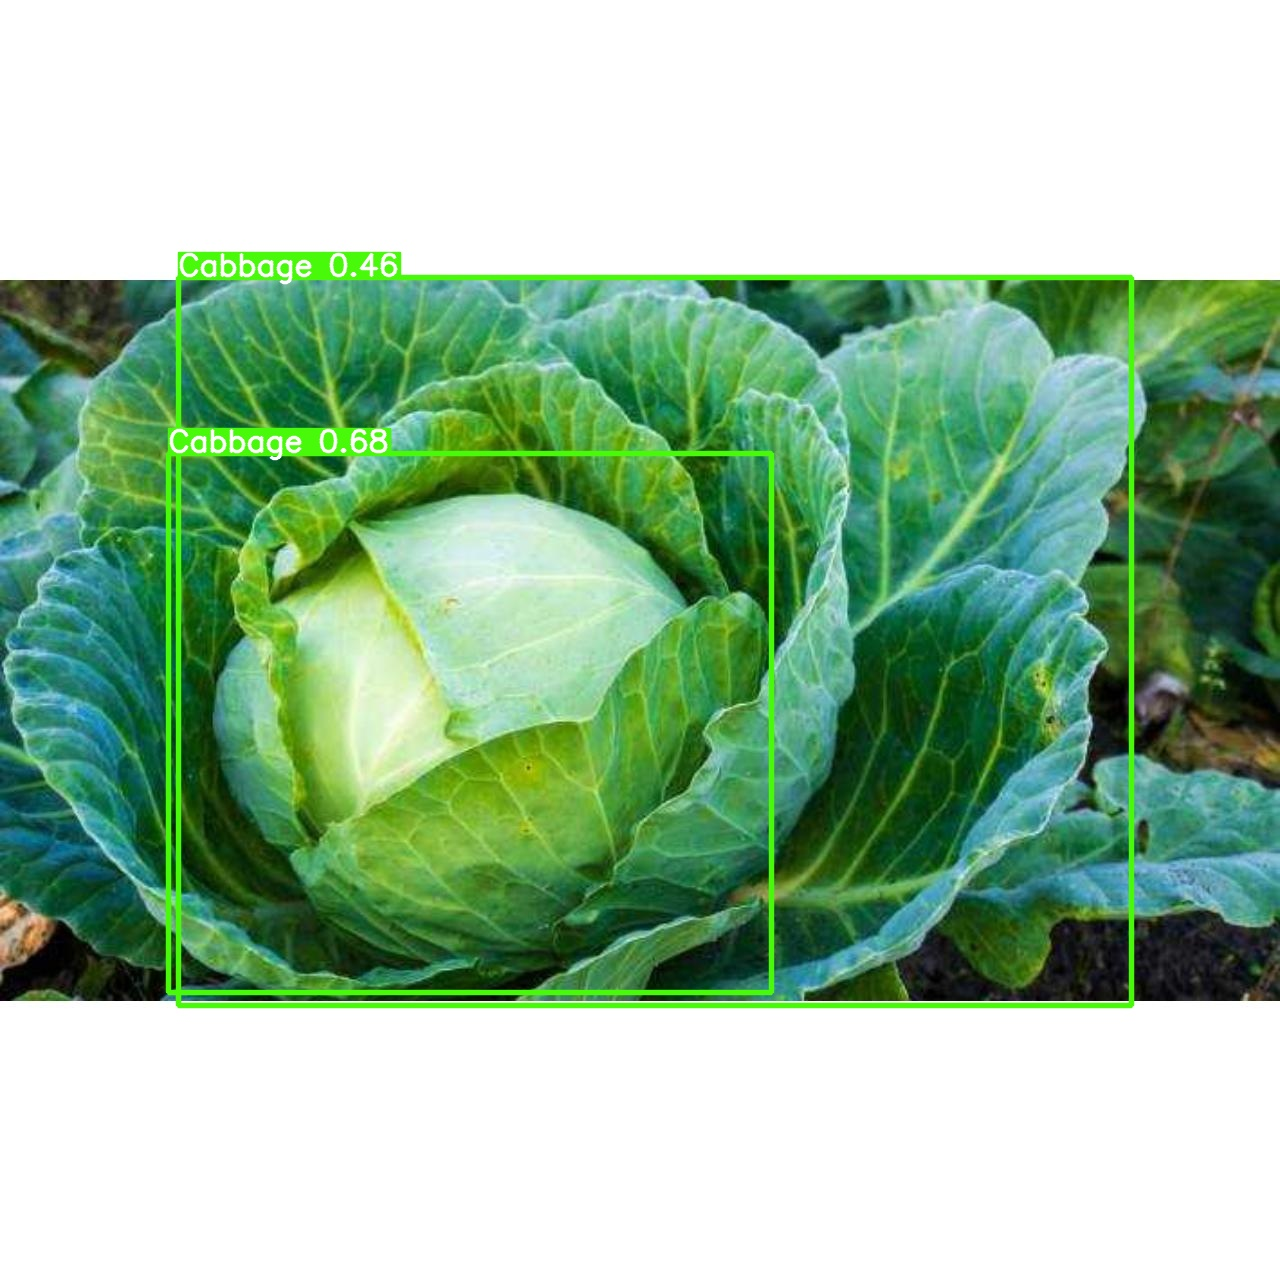

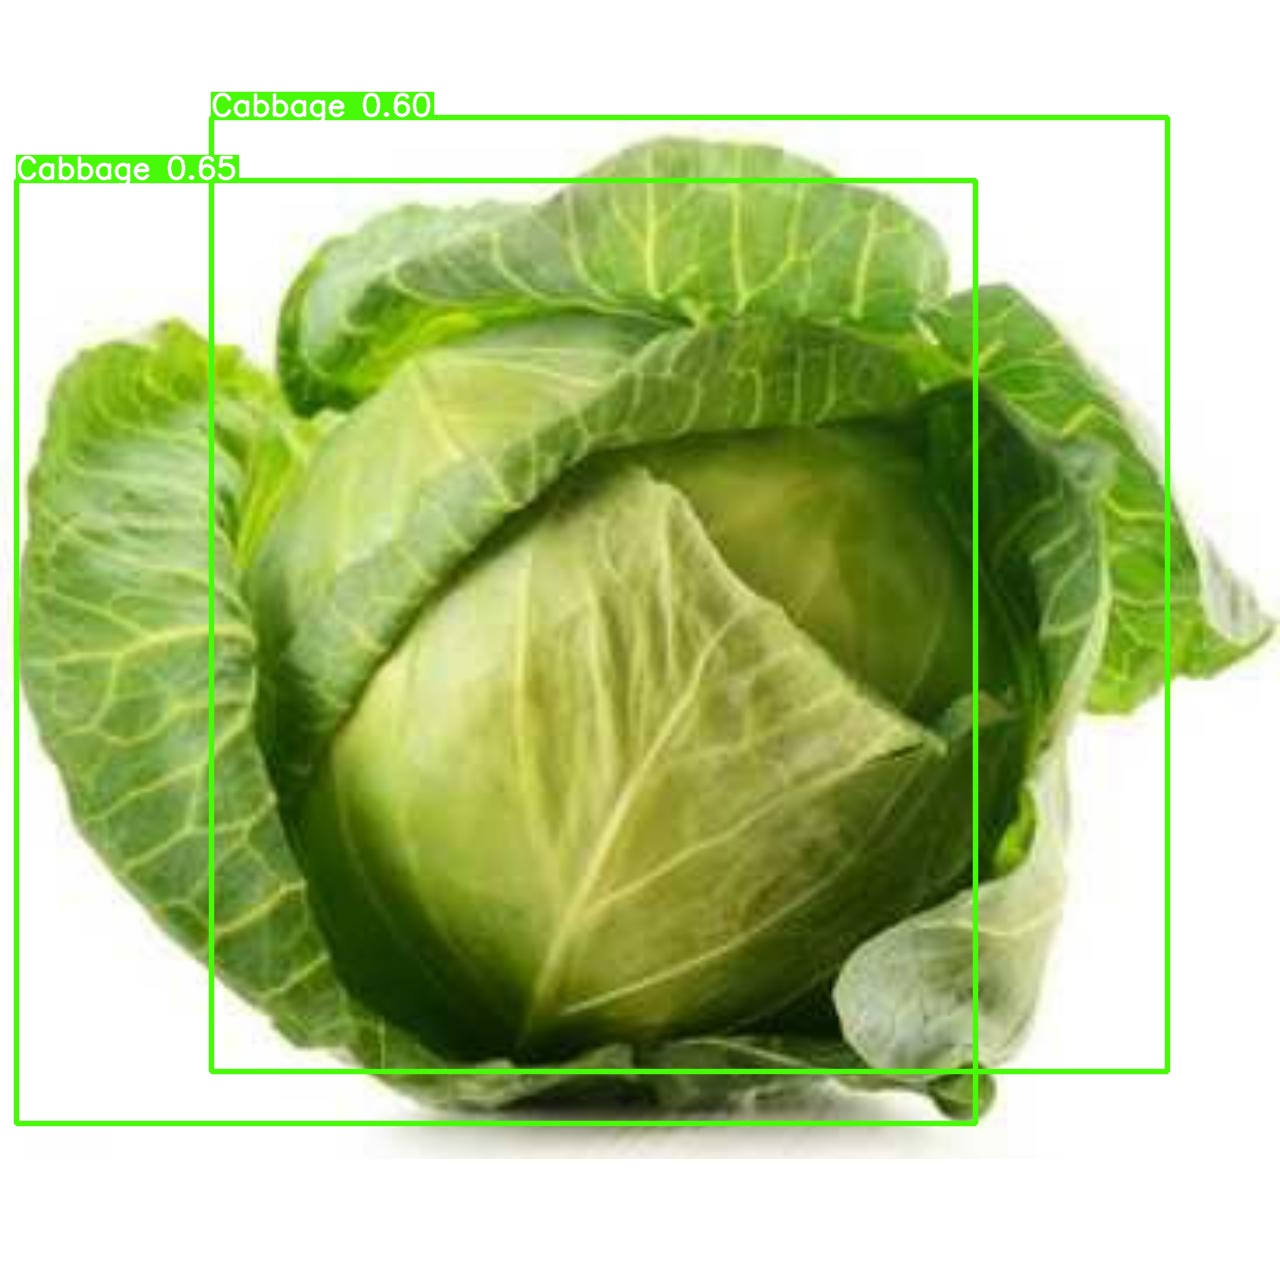

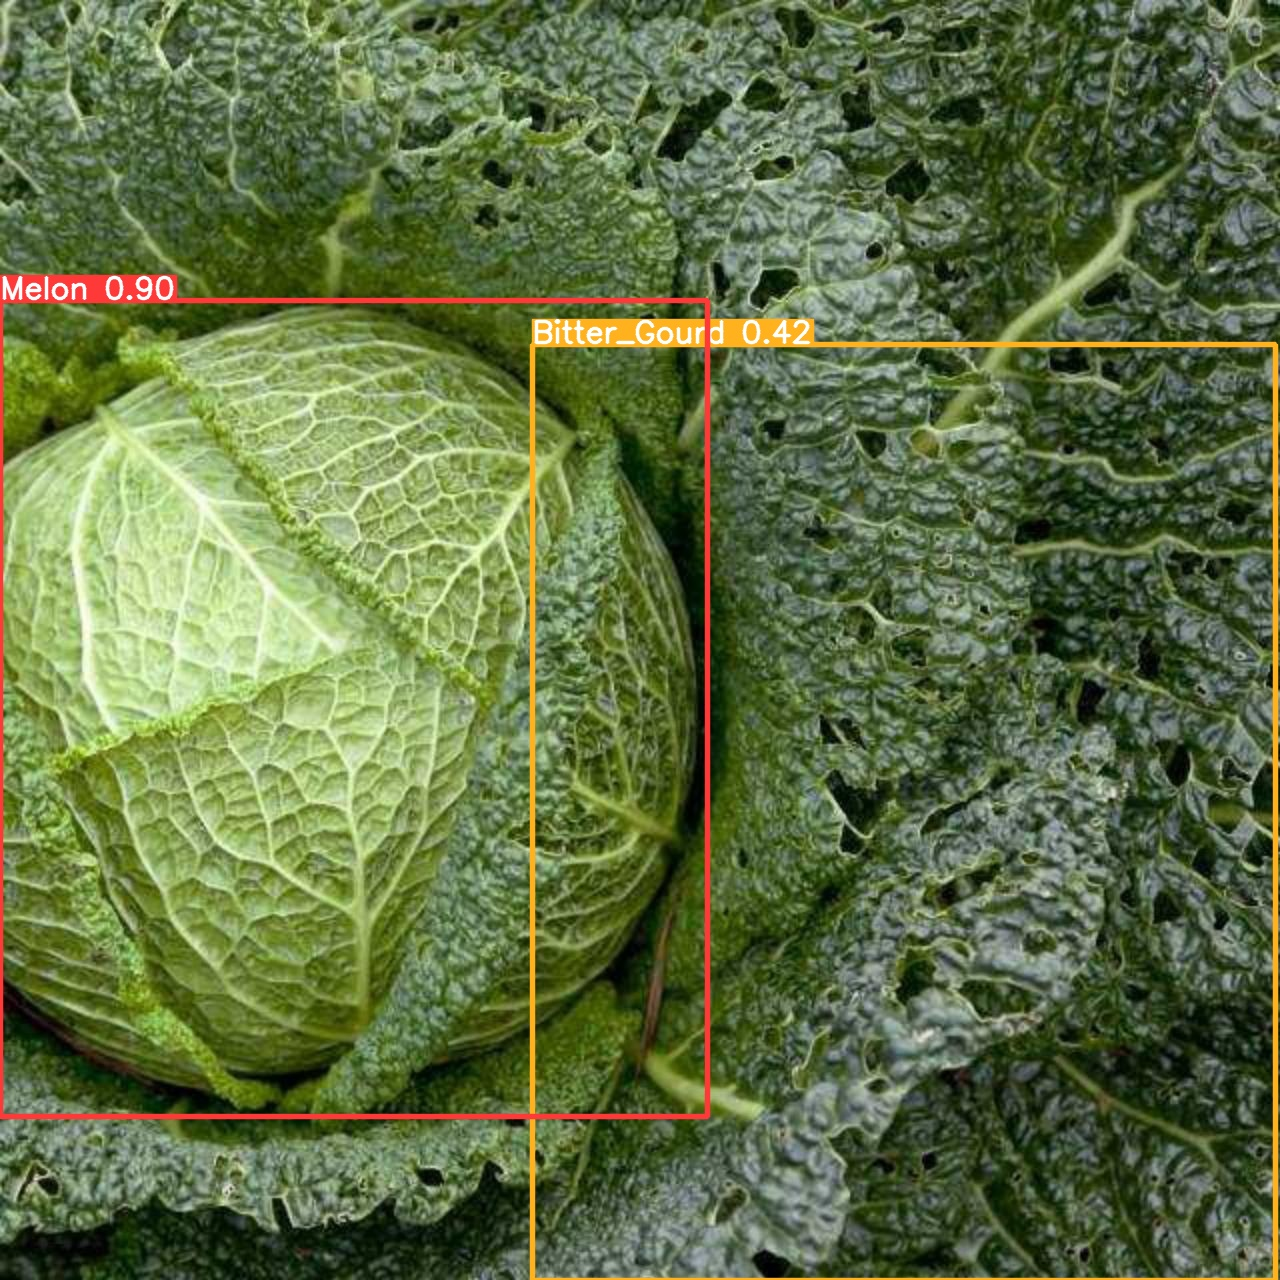

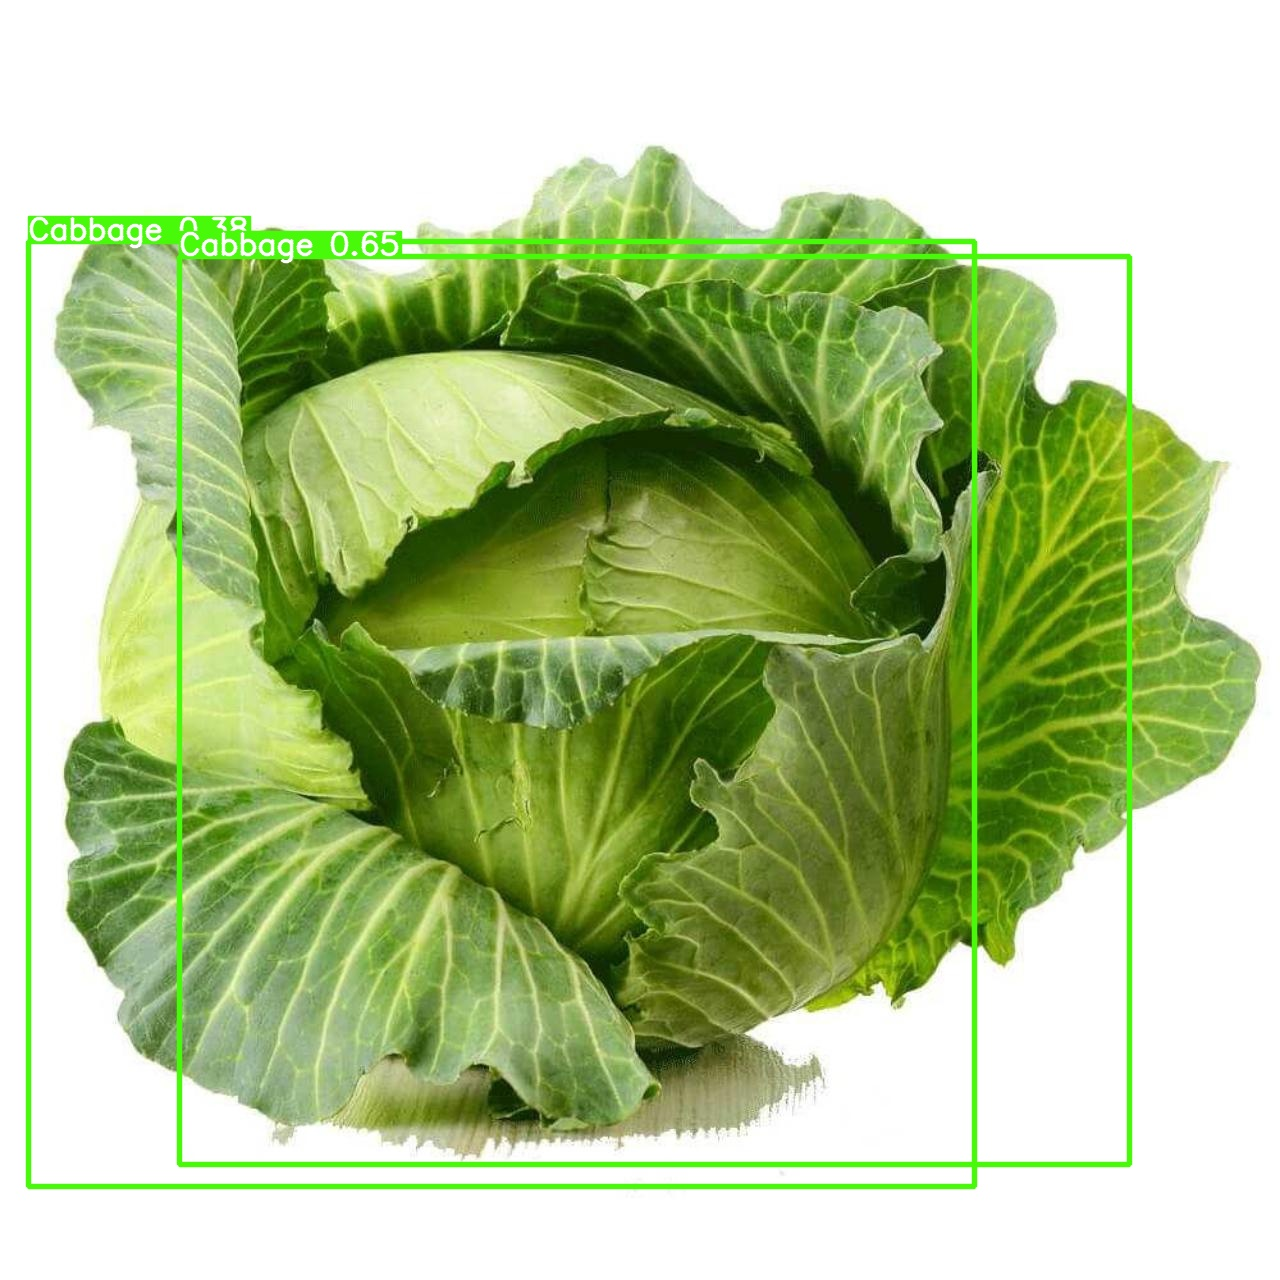

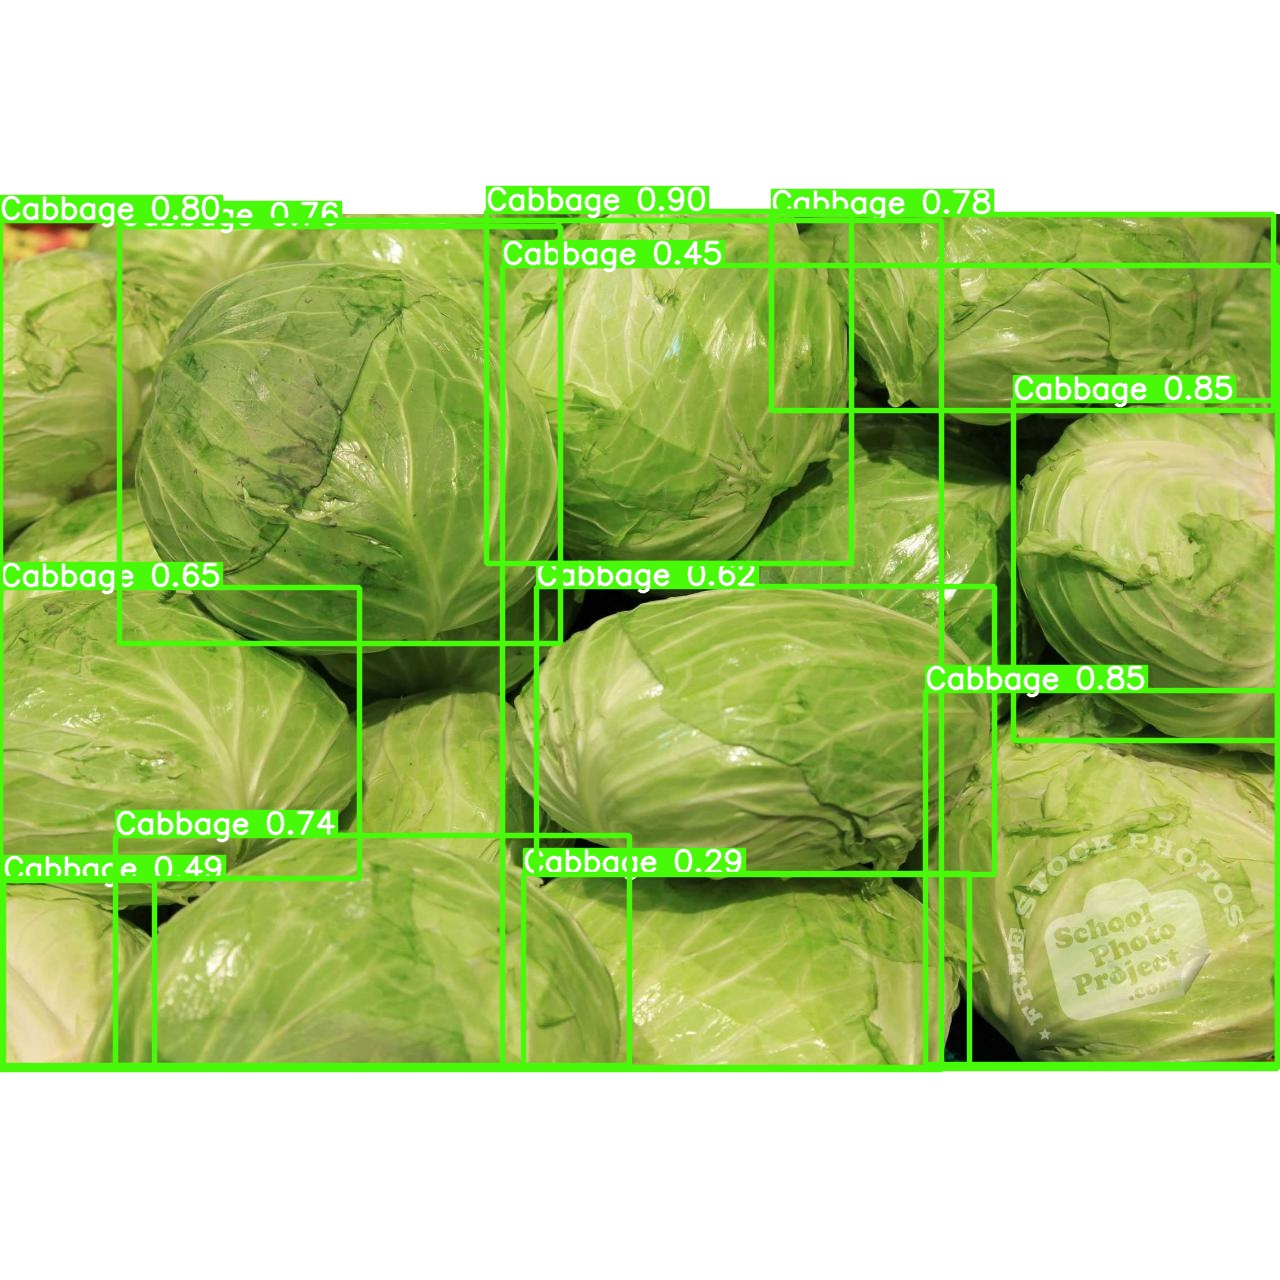

In [ ]:
# Execute this
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{gdrive_path}/predict/*.jpg')[3:8]:
      display(Image(filename=image_path, width=600))
      print("\n")

## 🏆 Congratulations